In [43]:
import numpy as np
import matplotlib.pylab as plt

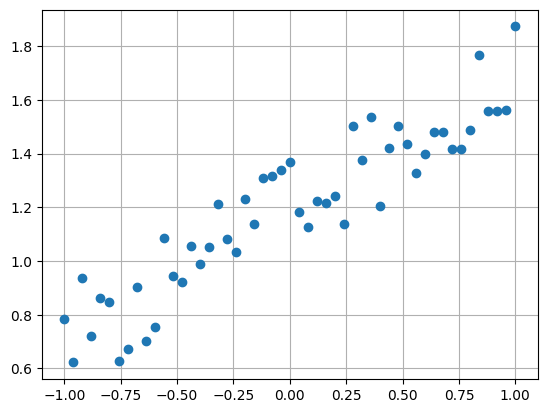

In [44]:
np.random.seed(320)
x_train = np.linspace(-1,1,51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train,'o')
plt.grid()
plt.show()       

In [45]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5*(w[0]*x_set[i] + w[1] - y_set[i])**2
    return val/N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0]*x_set[i]+ w[1]*y_set[i]
        val += er*np.array([x_set[i], 1.0])
    return val/N

def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches=[]    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [46]:
batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha = .9

In [47]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 3.36054008 -0.42622207] 2.7721680881629736
20 [ 2.80831554 -0.1549585 ] 1.8681057443686164
30 [ 2.33954761 -0.03074509] 1.3657459514609525
40 [1.94546494 0.02265045] 1.0728203417434488
50 [1.61601671 0.04249722] 0.89970740253515


In [48]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 0.4092706  -0.01868352] 0.7438180219185747
20 [ 7.19586098e-05 -7.68299012e-04] 0.7594454734635427
30 [-7.38867410e-04 -2.67289751e-05] 0.7586903649161607
40 [-1.36126103e-05  1.27893761e-06] 0.7585393913592755
50 [1.09008811e-06 1.84780176e-07] 0.758538318658066


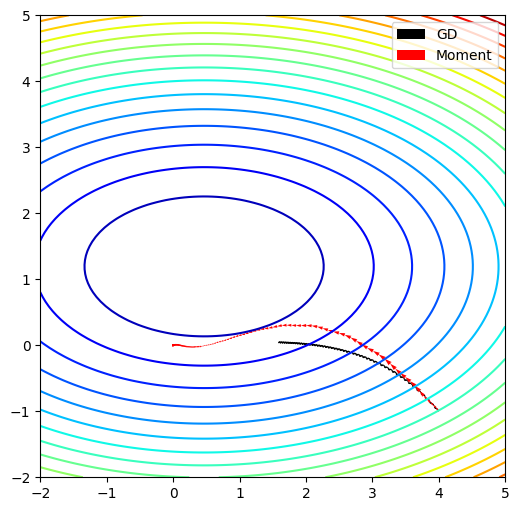

In [49]:
W0 = np.linspace(-2,5,101)
W1 = np.linspace(-2,5,101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j],W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize = (6,6))

ax.contour(W0,W1, LOSSW, cmap=plt.cm.jet,levels=np.linspace(0,max(LOSSW.flatten()),20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='r')

plt.legend(['GD','Moment'])
plt.show()

In [50]:
batch_size = 10
MaxEpochs = 51

epsilon = 0.25
delta = 1e-6

rho = 0.9

In [51]:
w0 = np.array([4.0, -1.0])
path_adagrad = []
r = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta +np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [1.38960417 0.04428193] 0.8163502757191472
20 [0.66175562 0.0273095 ] 0.6950535327013546
30 [0.32501416 0.01358429] 0.708092206180423
40 [0.16072084 0.00672075] 0.7289888345087178
50 [0.07960748 0.0033287 ] 0.7427775377324393


In [52]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 0.08073052 -0.01217941] 0.7612276311329997
20 [ 0.28429318 -0.01088844] 0.7395954372990402
30 [ 0.28913983 -0.0114838 ] 0.7400106714990157
40 [ 0.2892378  -0.01150709] 0.7400327347556489
50 [ 0.28923947 -0.01150784] 0.740033541688478


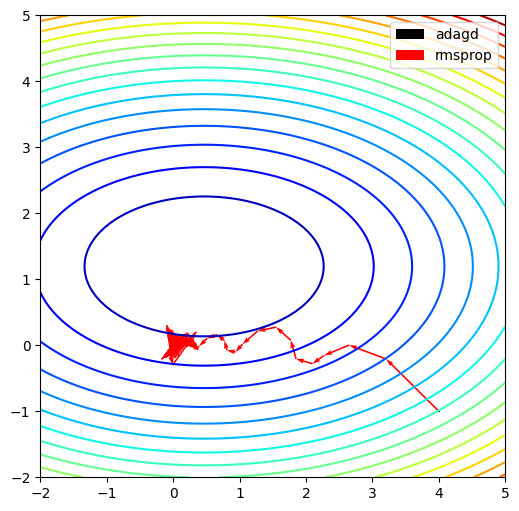

In [53]:
fig, ax = plt.subplots(figsize = (6,6))

ax.contour(W0,W1, LOSSW, cmap=plt.cm.jet,levels=np.linspace(0,max(LOSSW.flatten()),20))

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='r')

plt.legend(['adagd','rmsprop'])
plt.show()

In [54]:
MaxEpochs = 51
batch_size = 10
epsilon = 0.1
delta = 1E-6

rho = 0.9

delta_adam = 1E-8
rho1 = 0.9
rho2 = 0.999

In [55]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.03454282 0.00856996] 0.7429491940371504
20 [ 0.14019328 -0.00328467] 0.7431805032445196
30 [ 0.11624883 -0.00462994] 0.7476053768386945
40 [ 0.11566024 -0.00462281] 0.7476684546171609
50 [ 0.11564634 -0.00462178] 0.7476689025732475


In [60]:
w0 = np.array([4.0, -1.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1 * s + (1. -rho1) * grad
        r = rho2 * r + (1. -rho2) * (grad * grad)
        t += 1
        shat = s / (1. - rho1 ** t)
        rhat = r / (1. - rho2 ** t)
        delw = -epsilon * shat / (delta_adam + np.sqrt(rhat))
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 0.08890578 -0.03169332] 0.783891566509334
20 [0.0013173  0.00195775] 0.7559881904341978
30 [-5.48451674e-04 -4.43229158e-05] 0.758680521809058
40 [ 1.68135046e-07 -3.64426209e-06] 0.7585430435890942
50 [ 7.86875621e-07 -1.37166252e-07] 0.7585387524673383


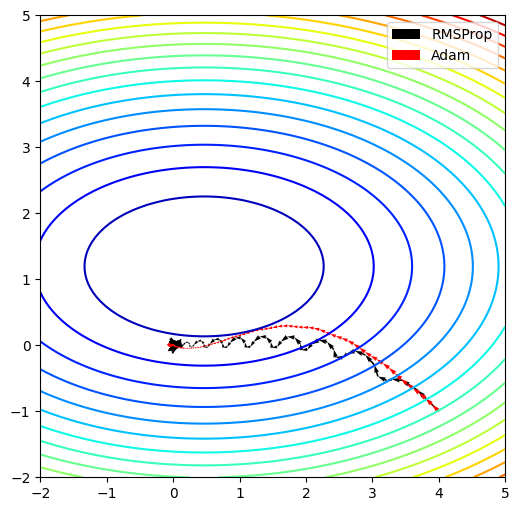

In [61]:
fig, ax = plt.subplots(figsize = (6,6))

ax.contour(W0,W1, LOSSW, cmap=plt.cm.jet,levels=np.linspace(0,max(LOSSW.flatten()),20))

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='r')

plt.legend(['RMSProp','Adam'])
plt.show()